In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('pos_ratios.csv', index_col=[0])
del df['GRND']
del df['PRTF']
df.head()

,ADVB,NOUN,NUMR,ADJ,NPRO,PRED,VERB,CONJ,INTJ,PREP,PRCL
Абиссаль,0.016,0.453,0.000,0.297,0.008,0.0,0.125,0.047,0.0,0.055,0.000
Автобус,0.034,0.415,0.008,0.119,0.025,0.0,0.144,0.059,0.0,0.161,0.034
Автомобиль,0.024,0.380,0.014,0.221,0.010,0.0,0.115,0.067,0.0,0.144,0.024
Азбука Морзе,0.021,0.515,0.010,0.186,0.000,0.0,0.113,0.062,0.0,0.082,0.010
Айсберг,0.017,0.450,0.000,0.117,0.017,0.0,0.133,0.117,0.0,0.133,0.017


## Сокращения частей речи
| Сокращение | Часть речи |
|-::|-::|
| ADVB | Наречие |
| NOUN | Имя существительное |
| NUMR | Имя числительное |
| ADJ | Имя прилагательное |
| NPRO | Местоимение-существительное |
| PRED | Предикатив |
| VERB | Глагол |
| CONJ | Союз |
| INTJ | Междометие |
| PREP | Предлог |
| PRCL | Частица |

In [48]:
print('Средние значения долей частей речи в документах, в которых они появляются:\n')
for i in df.columns:
    print("{}'s mean is".format(i), round(df[df[i] != 0][i].mean(), 3))

Средние значения долей частей речи в документах, в которых они появляются:

ADVB's mean is 0.035
NOUN's mean is 0.452
NUMR's mean is 0.016
ADJ's mean is 0.203
NPRO's mean is 0.019
PRED's mean is 0.01
VERB's mean is 0.104
CONJ's mean is 0.07
INTJ's mean is 0.01
PREP's mean is 0.132
PRCL's mean is 0.024


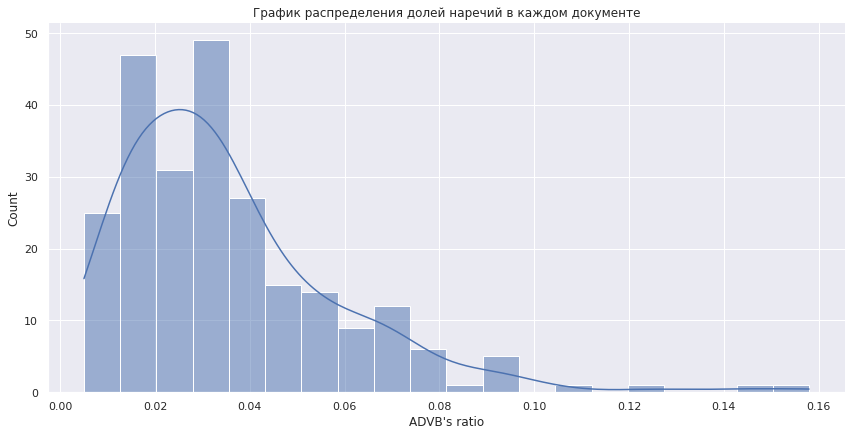

In [135]:
sns.displot(data=df[df['ADVB'] != 0], x="ADVB", kde=True, aspect=2, height=6)
plt.title('График распределения долей наречий в каждом документе')
plt.xlabel("ADVB's ratio");

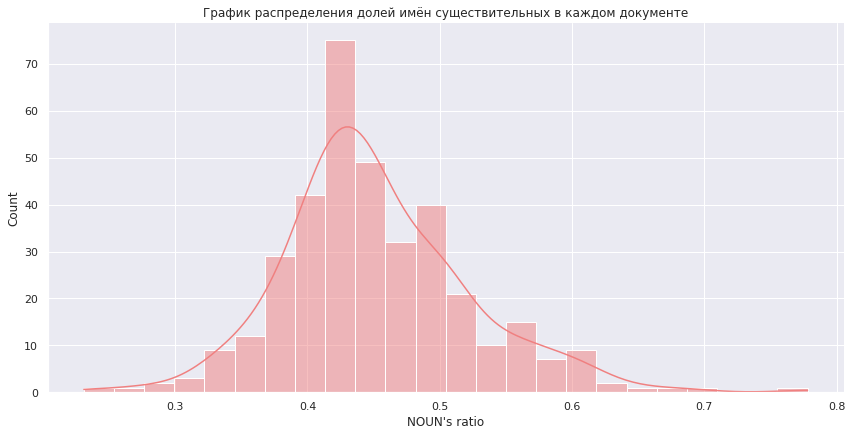

In [146]:
sns.displot(data=df[df['NOUN'] != 0], x="NOUN", kde=True, aspect=2, height=6, color='lightcoral')
plt.title('График распределения долей имён существительных в каждом документе')
plt.xlabel("NOUN's ratio");

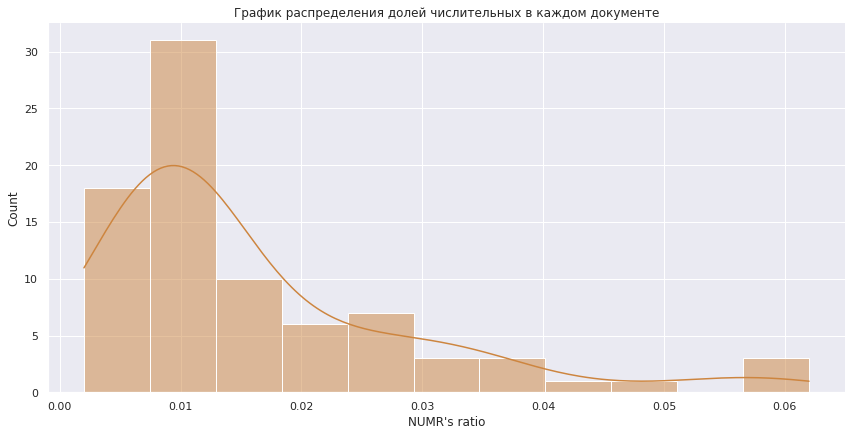

In [148]:
sns.displot(data=df[df['NUMR'] != 0], x="NUMR", kde=True, aspect=2, height=6, color='peru')
plt.title('График распределения долей числительных в каждом документе')
plt.xlabel("NUMR's ratio");

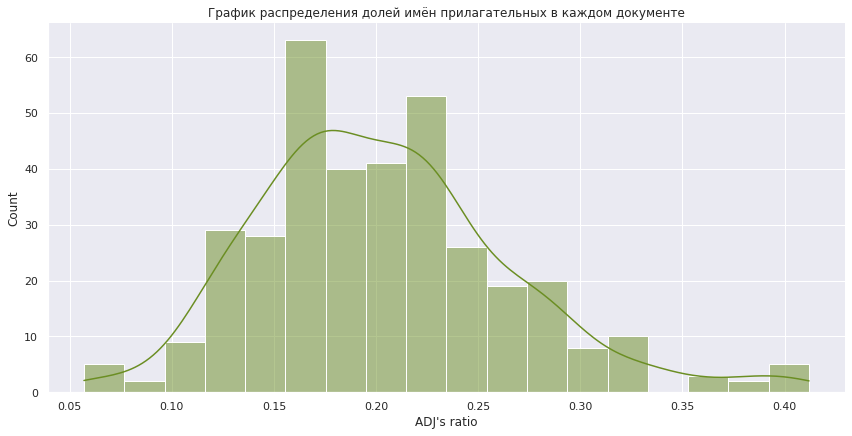

In [149]:
sns.displot(data=df[df['ADJ'] != 0], x="ADJ", kde=True, aspect=2, height=6, color='olivedrab')
plt.title('График распределения долей имён прилагательных в каждом документе')
plt.xlabel("ADJ's ratio");

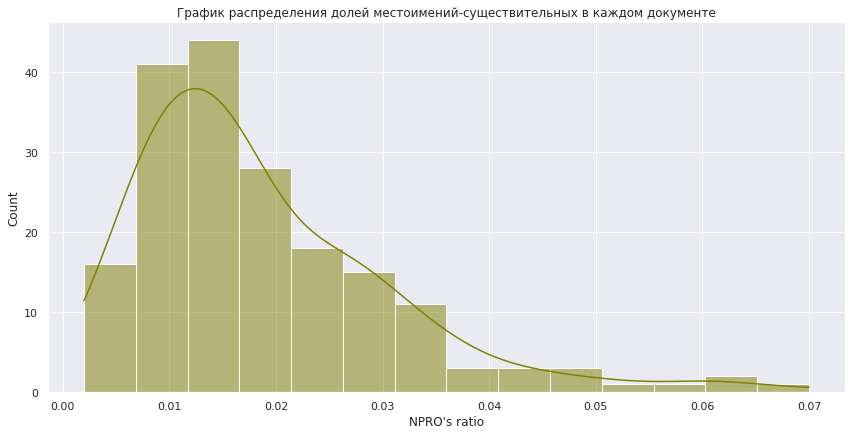

In [151]:
sns.displot(data=df[df['NPRO'] != 0], x="NPRO", kde=True, aspect=2, height=6, color='olive')
plt.title('График распределения долей местоимений-существительных в каждом документе')
plt.xlabel("NPRO's ratio");

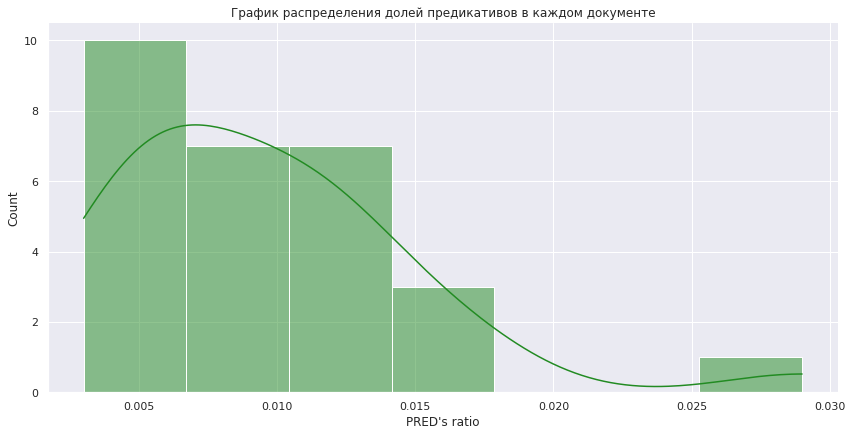

In [152]:
sns.displot(data=df[df['PRED'] != 0], x="PRED", kde=True, aspect=2, height=6, color='forestgreen')
plt.title('График распределения долей предикативов в каждом документе')
plt.xlabel("PRED's ratio");

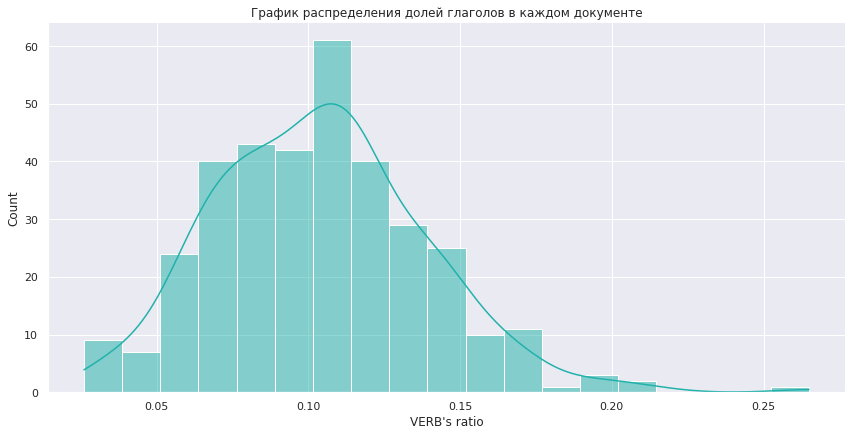

In [153]:
sns.displot(data=df[df['VERB'] != 0], x="VERB", kde=True, aspect=2, height=6, color='lightseagreen')
plt.title('График распределения долей глаголов в каждом документе')
plt.xlabel("VERB's ratio");

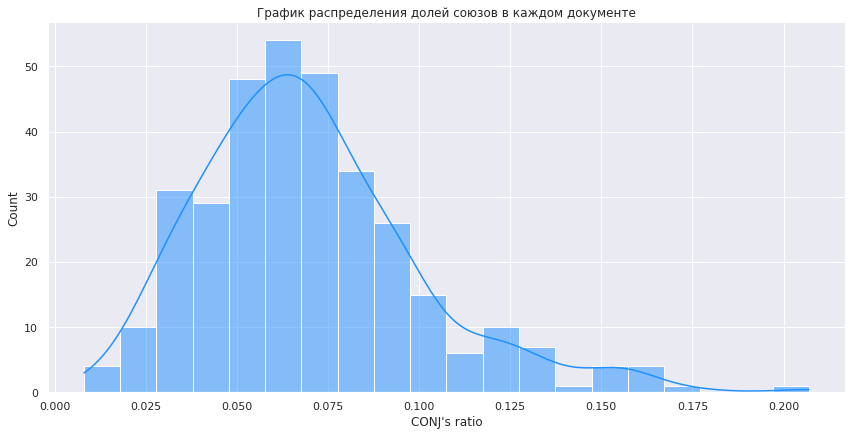

In [154]:
sns.displot(data=df[df['CONJ'] != 0], x="CONJ", kde=True, aspect=2, height=6, color='dodgerblue')
plt.title('График распределения долей союзов в каждом документе')
plt.xlabel("CONJ's ratio");

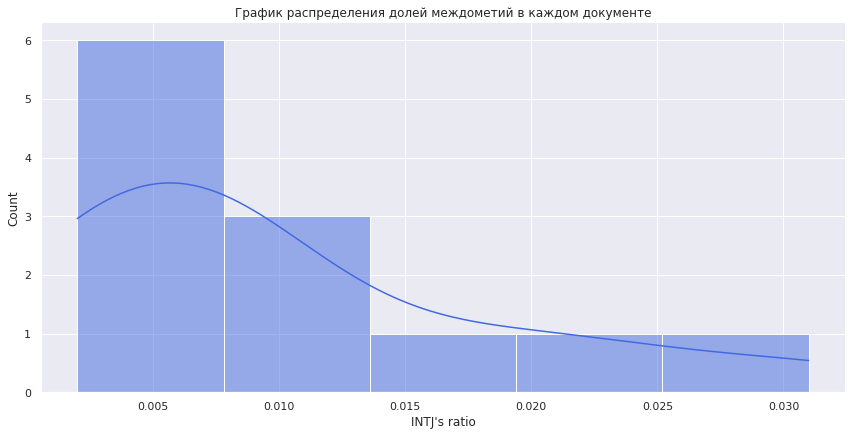

In [155]:
sns.displot(data=df[df['INTJ'] != 0], x="INTJ", kde=True, aspect=2, height=6, color='royalblue')
plt.title('График распределения долей междометий в каждом документе')
plt.xlabel("INTJ's ratio");

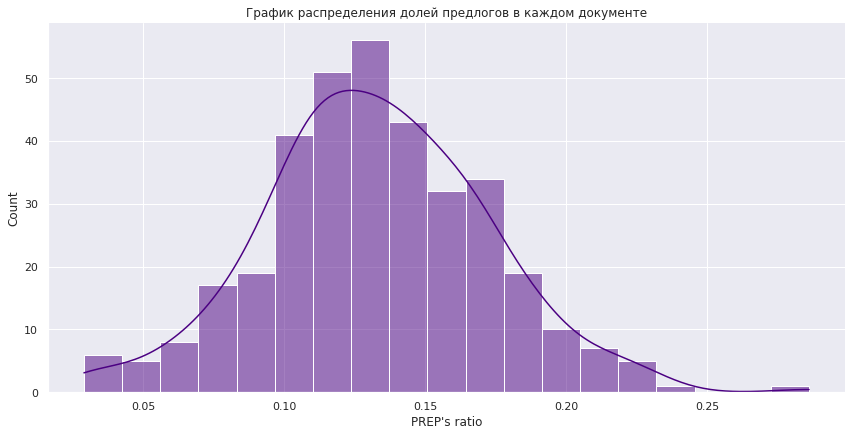

In [156]:
sns.displot(data=df[df['PREP'] != 0], x="PREP", kde=True, aspect=2, height=6, color='indigo')
plt.title('График распределения долей предлогов в каждом документе')
plt.xlabel("PREP's ratio");

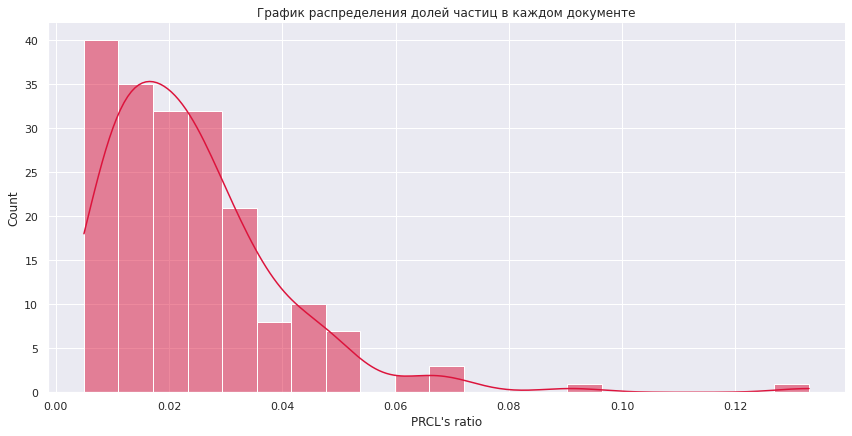

In [157]:
sns.displot(data=df[df['PRCL'] != 0], x="PRCL", kde=True, aspect=2, height=6, color='crimson')
plt.title('График распределения долей частиц в каждом документе')
plt.xlabel("PRCL's ratio");

In [179]:
pos_appearances = [len(df[df[i] != 0]) for i in df.columns]
d = {}
for i in range(len(df.columns)):
    d[df.columns[i]] = [pos_appearances[i], round(pos_appearances[i]/len(df), 2)]
    df2 = pd.DataFrame.from_dict(d)
df2

,ADVB,NOUN,NUMR,ADJ,NPRO,PRED,VERB,CONJ,INTJ,PREP,PRCL
0,245.00,363.0,83.00,363.0,187.00,28.00,348.00,334.00,12.00,355.00,192.00
1,0.67,1.0,0.23,1.0,0.52,0.08,0.96,0.92,0.03,0.98,0.53


Существительные и Прилагательные встречаются во всех документах. Глаголы и предлоги встречаются в более 90% документов. Реже всего встречаются междометия - всего в 3% документов (из 363)

### Найдём "нетипичные" документы

In [180]:
print('Стандартные отклонения долей частей речи в документах, в которых они появляются:\n')
for i in df.columns:
    print("{}'s mean is".format(i), round(df[df[i] != 0][i].std(), 3))

Стандартные отклонения долей частей речи в документах, в которых они появляются:

ADVB's mean is 0.024
NOUN's mean is 0.071
NUMR's mean is 0.013
ADJ's mean is 0.062
NPRO's mean is 0.012
PRED's mean is 0.006
VERB's mean is 0.035
CONJ's mean is 0.031
INTJ's mean is 0.009
PREP's mean is 0.04
PRCL's mean is 0.016


In [182]:
stds_2 = [(i, 2*round(df[df[i] != 0][i].std(), 3)) for i in df.columns]
stds_2

[('ADVB', 0.048),
 ('NOUN', 0.142),
 ('NUMR', 0.026),
 ('ADJ', 0.124),
 ('NPRO', 0.024),
 ('PRED', 0.012),
 ('VERB', 0.07),
 ('CONJ', 0.062),
 ('INTJ', 0.018),
 ('PREP', 0.08),
 ('PRCL', 0.032)]

In [201]:
for i in stds_2:
    submean = df[df[i[0]] != 0][i[0]].mean()
    print('Нетипичные документы по {}:'.format(i[0]))
    res = list(df[(df[i[0]] < (submean - 2*i[1])) | (df[i[0]] > (submean + 2*i[1]))].index)
    if not res:
        print('Таких нет')
    else:
        print(res)
    print('\n')

Нетипичные документы по ADVB:
['Сгущённое молоко', 'Цистерна']


Нетипичные документы по NOUN:
['Пенсильвания']


Нетипичные документы по NUMR:
Таких нет


Нетипичные документы по ADJ:
Таких нет


Нетипичные документы по NPRO:
['Сахар']


Нетипичные документы по PRED:
Таких нет


Нетипичные документы по VERB:
['Алвин']


Нетипичные документы по CONJ:
['Фильм-катастрофа']


Нетипичные документы по INTJ:
Таких нет


Нетипичные документы по PREP:
Таких нет


Нетипичные документы по PRCL:
['Лимон', 'Саундтрек']




In [203]:
import json


with open("corpus_as_dict.json") as f:
    corpus = json.load(f)

In [204]:
corpus['Сгущённое молоко']

'Сгущенное молоко — концентрированное молоко, обычно с сахаром.'

In [205]:
corpus['Цистерна']

'Цистерна — закрытое хранилище, первоначально для жидкостей, а теперь и для сыпучих веществ. Известны еще в библейские и античные времена.'

In [206]:
corpus['Пенсильвания']

'Пенсильвания, официально — Содружество Пенсильвании — штат на Северо-Востоке США. Столица — город Гаррисберг. Крупнейший город — Филадельфия. Девиз штата — «Добродетель, свобода и независимость». Официальное прозвище Пенсильвании — «Штат замкового камня», «Штат квакеров».'

In [207]:
corpus['Сахар']

'Сахар — распространенный продовольственный товар. Основной компонент сахара — сахароза. Но кроме нее продукт может содержать различные примеси. В белом сахаре допускается их содержание до 0,25 %, в рафинированном — до 0,1 %. Сахар является важным пищевым продуктом. Сахара — то же, что низкомолекулярные углеводы. Некоторые из них имеют сладкий вкус.'

In [208]:
corpus['Алвин']

'Алвин — один из известнейших действующих пилотируемых подводных аппаратов. Аппарат рассчитан на трех человек и позволяет за 10 часов совершать погружение на глубину до 4500 метров. Размеры используемого оборудования ограничены размерами люка аппарата, который имеет диаметр 48,2 см.'

In [209]:
corpus['Фильм-катастрофа']

'Фильм-катастрофа или фильм катастроф — фильм, герои которого попали в катастрофу и пытаются спастись. Специфическая разновидность триллера и драмы. Речь может идти как о природном бедствии, так и о техногенной катастрофе.'

In [210]:
corpus['Лимон']

'Лимон — растение; вид рода Цитрус подтрибы Цитрусовые семейства Рутовые. Лимоном также называется плод этого растения.'

In [211]:
corpus['Саундтрек']

'Саундтрек — музыкальное сопровождение какого-либо материала, а также музыкальный альбом, содержащий композиции из данного произведения. С развитием технологий саундтреки стали создаваться не только для мультфильмов и кинокартин, но и для телевизионных передач, компьютерных игр и даже для некоторых книг. Однако порядок именования саундтреков остался тот же.'